In [2]:

import os
os.chdir("F:/PythonProject/MirrorMind")  # Укажите путь к корню проекта
print(os.getcwd())  # Проверьте, что директория изменилась


F:\PythonProject\MirrorMind


In [3]:
import os
print(os.getcwd())  # Покажет текущую рабочую директорию Jupyter



F:\PythonProject\MirrorMind


In [4]:
import json
from config import DATA_FILES  # Импортируем словарь с путями к файлам

# Определяем функцию load_chat_data
def load_chat_data(file_path):
    """
    Загружает данные из указанного файла JSON.
    :param file_path: Путь к файлу JSON.
    :return: JSON-объект с данными.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            print("Файл успешно загружен.")
            print("Формат: <json>")
            return data
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")
        raise

if __name__ == "__main__":
    try:
        # Загружаем данные в переменную data
        data = load_chat_data(DATA_FILES["GN"])  # Передаём путь к файлу из словаря DATA_FILES
        print("Данные успешно загружены.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


Файл успешно загружен.
Формат: <json>
Данные успешно загружены.


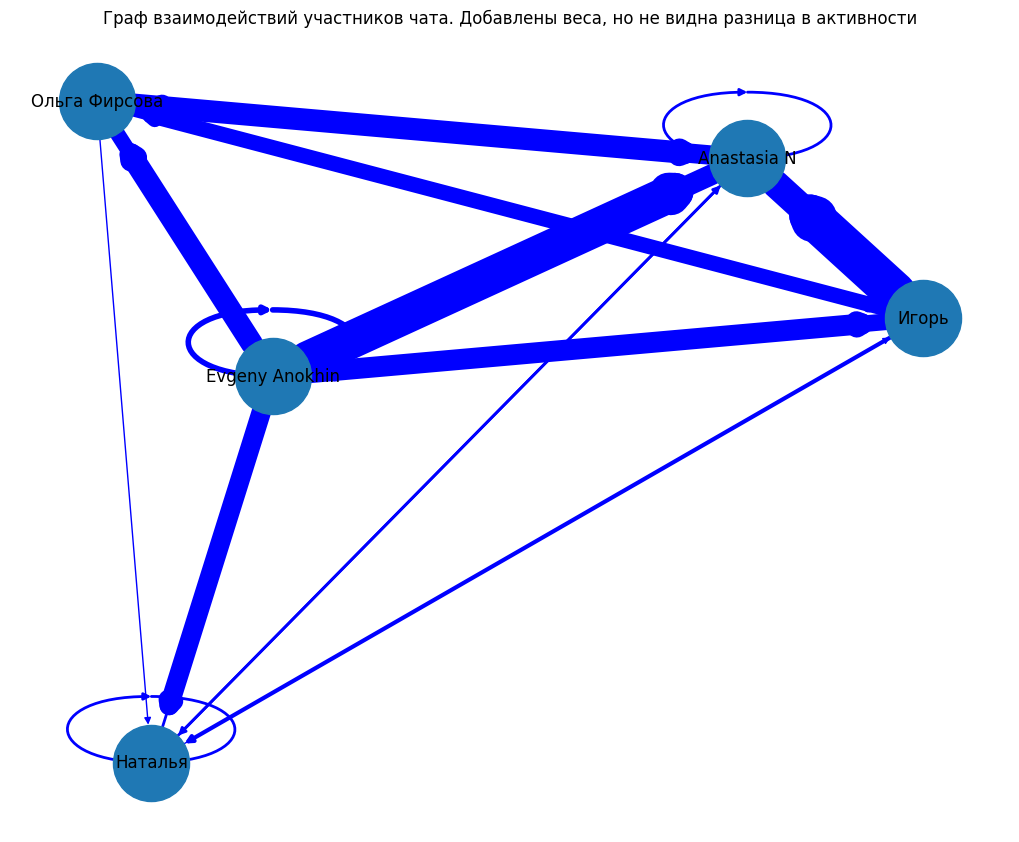

NameError: name 'graph' is not defined

In [19]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    # Добавляем связи в граф
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_graph(graph):
    """
    Визуализирует граф взаимодействий.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)
    weights = [graph[u][v]['weight'] for u, v in graph.edges()] # вес ребер - толщина
    nx.draw(graph, pos, with_labels=True, node_size=3000, width=weights, edge_color='blue')

    plt.title("Граф взаимодействий участников чата. Добавлены веса, но не видна разница в активности")
    plt.show()

# Основная программа
if __name__ == "__main__":
    # Путь к файлу данных
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, 'data', 'sample.json')  # Укажите правильный путь к вашему JSON

    # Загружаем данные
    chat_data = load_chat_data(file_path)

    if chat_data is not None:
        # Построение графа взаимодействий
        interaction_graph = build_interaction_graph(chat_data)

        # Визуализация графа
        visualize_graph(interaction_graph)

        interaction_counts = [(u, v, d['weight']) for u, v, d in graph.edges(data=True)]
print(interaction_counts)



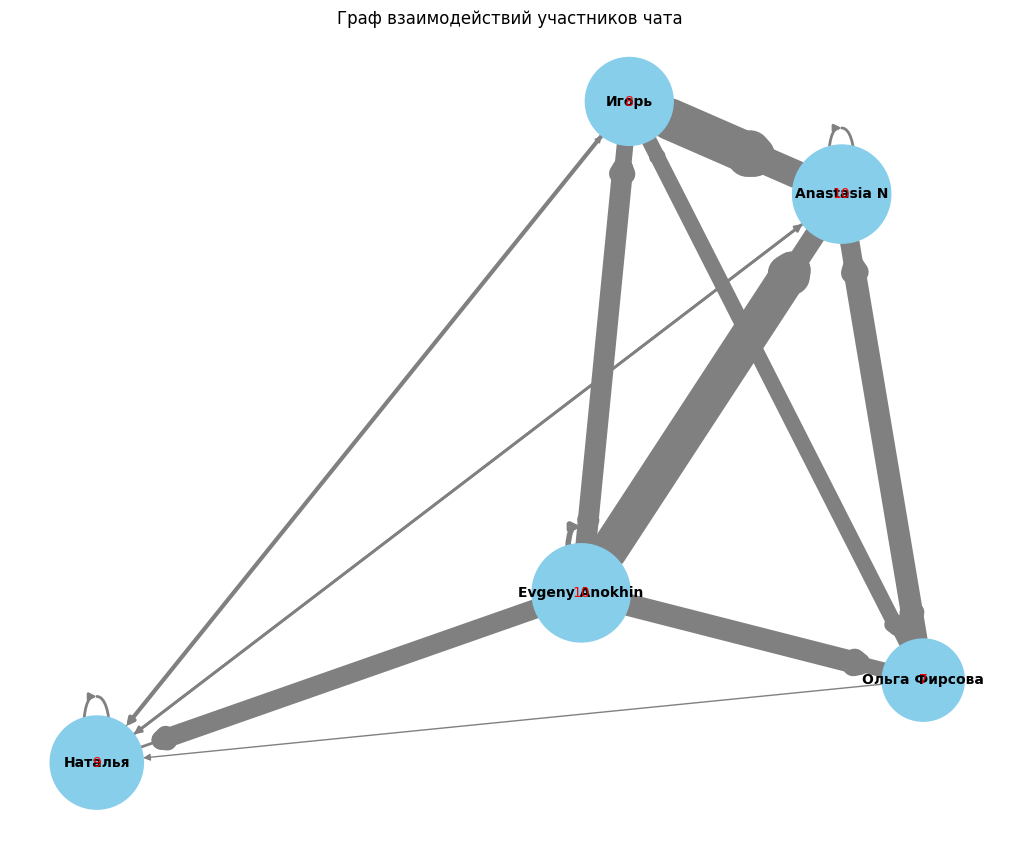

[('Ольга Фирсова', 'Игорь', 8), ('Ольга Фирсова', 'Anastasia N', 16), ('Ольга Фирсова', 'Evgeny Anokhin', 11), ('Ольга Фирсова', 'Наталья', 1), ('Игорь', 'Ольга Фирсова', 11), ('Игорь', 'Anastasia N', 30), ('Игорь', 'Evgeny Anokhin', 12), ('Игорь', 'Наталья', 3), ('Anastasia N', 'Игорь', 20), ('Anastasia N', 'Ольга Фирсова', 14), ('Anastasia N', 'Anastasia N', 2), ('Anastasia N', 'Evgeny Anokhin', 15), ('Anastasia N', 'Наталья', 2), ('Evgeny Anokhin', 'Anastasia N', 27), ('Evgeny Anokhin', 'Evgeny Anokhin', 4), ('Evgeny Anokhin', 'Игорь', 15), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Наталья', 14), ('Наталья', 'Evgeny Anokhin', 2), ('Наталья', 'Anastasia N', 2), ('Наталья', 'Наталья', 2), ('Наталья', 'Игорь', 1)]


In [22]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    # Добавляем связи в граф
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_graph(graph):
    """
    Визуализирует граф взаимодействий с размерами узлов по активности
    и подписями числовых значений.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)

    # Размер узлов пропорционален их степени (активности)
    node_sizes = [graph.degree(node) * 500 for node in graph.nodes()]
    weights = [graph[u][v]['weight'] for u, v in graph.edges()]

    # Рисуем граф
    nx.draw(
        graph, pos, with_labels=True, node_size=node_sizes, 
        node_color='skyblue', font_size=10, font_weight='bold', 
        edge_color='gray', width=weights
    )

    # Добавляем числовые подписи
    labels = {node: f"{graph.degree(node)}" for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color='red')

    plt.title("Граф взаимодействий участников чата")
    plt.show()


# Основная программа
if __name__ == "__main__":
    # Путь к файлу данных
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, 'data', 'sample.json')  # Укажите правильный путь к вашему JSON

    # Загружаем данные
    chat_data = load_chat_data(file_path)

    if chat_data is not None:
        # Построение графа взаимодействий
        interaction_graph = build_interaction_graph(chat_data)
    
        # Визуализация графа
        visualize_graph(interaction_graph)
    
        # Подсчет взаимодействий
        interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
        print(interaction_counts)

